## Resale Flat Prices

In [1]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# *Reading the "csv" files (Registration)* 

In [2]:
# reading the 2012 to 2014
df_1= pd.read_csv(r"C:\Users\USER\Downloads\New folder\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [3]:
# reading the 2015 to 2016
df_2= pd.read_csv(r"C:\Users\USER\Downloads\New folder\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_2.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [4]:
# reading the 2017 to onwards
df_3= pd.read_csv(r"C:\Users\USER\Downloads\New folder\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


## Preprocessing

In [5]:
#df_1 does not have a "remaining_lease" column so, I choose the df_2 and df_3 only

#concadinating the df_2 and df_3

df_4= pd.concat([df_2,df_3],axis= 0)
df_4.reset_index(drop= True, inplace= True)
df_4.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
220153,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62 years 08 months,1000000.0
220154,2024-06,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,07 TO 09,171.0,Multi Generation,1987,62 years 07 months,1028000.0


In [6]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220155 entries, 0 to 220154
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                220155 non-null  object 
 1   town                 220155 non-null  object 
 2   flat_type            220155 non-null  object 
 3   block                220155 non-null  object 
 4   street_name          220155 non-null  object 
 5   storey_range         220155 non-null  object 
 6   floor_area_sqm       220155 non-null  float64
 7   flat_model           220155 non-null  object 
 8   lease_commence_date  220155 non-null  int64  
 9   remaining_lease      220155 non-null  object 
 10  resale_price         220155 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.5+ MB


In [7]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [8]:
# This Dataset have not any null values

## Encoding the catogarical columns and 
## chaning the datatype

In [9]:
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [10]:
# Creating a new column "address"
df_4["address"]= df_4["block"]+" "+df_4["street_name"]

In [11]:
#droping the "street_name" and "block"
df_5= df_4.drop(columns=["block","street_name"])

In [12]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [13]:
# for month
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")

In [14]:
#spliting the month column to "Year", "month", "day"
df_5["year"]= df_5["month"].dt.year
df_5["month"]= df_5["month"].dt.month

In [15]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [16]:
df_5["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [17]:
df_5["town"].nunique()

26

In [18]:
df_5["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [19]:
df_5["flat_type"].nunique()

7

In [20]:
df_5["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [21]:
df_5["flat_model"].nunique()

21

In [22]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"]= LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"]= OrdinalEncoder().fit_transform(df_5[["flat_model"]])
df_5["flat_type"]= OrdinalEncoder().fit_transform(df_5[["flat_type"]])

In [23]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [24]:
df_5["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [25]:
df_5["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [26]:
df_5.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
220153,6,25,5.0,04 TO 06,146.0,7.0,1988,62 years 08 months,1000000.0,826 YISHUN ST 81,2024
220154,6,25,6.0,07 TO 09,171.0,11.0,1987,62 years 07 months,1028000.0,633 YISHUN ST 61,2024


In [27]:
df_5[["storey_start", "storey_end"]]= df_5["storey_range"].str.split(" TO ",expand=True)

In [28]:
#droping the "storey_range" column
df_5.drop(columns=["storey_range"],inplace= True)

In [29]:
df_5.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [30]:
df_5["address"].nunique()

9593

In [31]:
# Address have 9559 unique values in the 207823 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df_5["address"]= LabelEncoder().fit_transform(df_5["address"])

In [32]:
df_5["storey_start"]= df_5["storey_start"].astype(int)
df_5["storey_end"]= df_5["storey_end"].astype(int)

In [33]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [34]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [35]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [36]:
#droping the "remaining_lease" column
df_5.drop(columns=["remaining_lease"],inplace= True)

In [37]:
df_6= pd.concat([df_5,df_data],axis=1)

In [38]:
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [39]:
# set the columns
df_7= df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [40]:
df_8=df_7.sort_values(by=["year","month"])

In [41]:
df_8.to_csv("ResaleFlatPrices.csv", index= False)

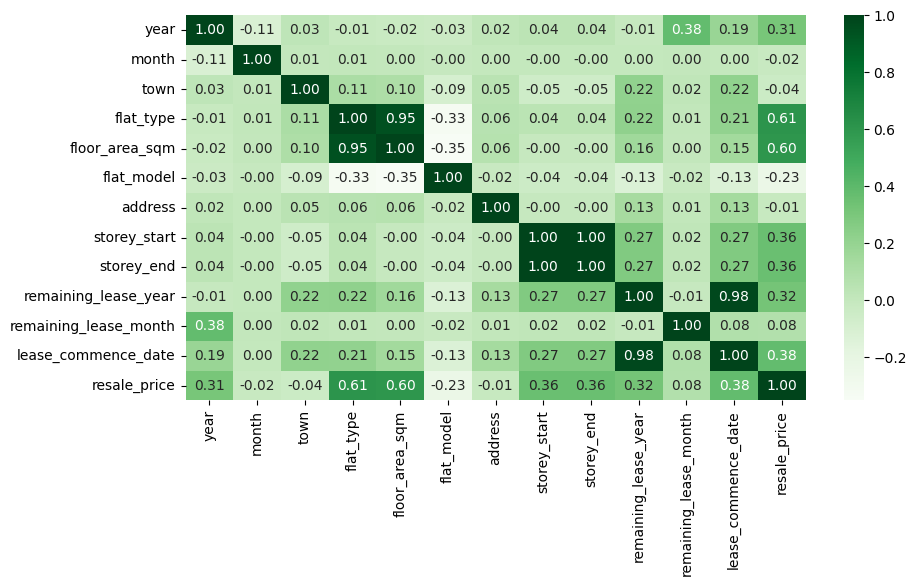

In [42]:
# Checking the Correlation using heatmap

df_8_corr= df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [43]:
df_final= pd.read_csv(r"C:\Users\USER\Downloads\New folder\ResaleFlatPrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1636,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6598,1,3,65,0,1981,275000.0


In [44]:
# checking the duplicate values
df_final.duplicated().sum()

312

In [45]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [46]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
219841,2024,6,25,5.0,146.0,7.0,8884,4,6,62,8,1988,1000000.0
219842,2024,6,25,6.0,171.0,11.0,7375,7,9,62,7,1987,1028000.0


In [47]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns

In [48]:
df_final_2= df_final_1.drop(columns=["month","address"])

In [49]:
df_final_2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
219841,2024,25,5.0,146.0,7.0,4,6,62,8,1988,1000000.0
219842,2024,25,6.0,171.0,11.0,7,9,62,7,1987,1028000.0


In [50]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

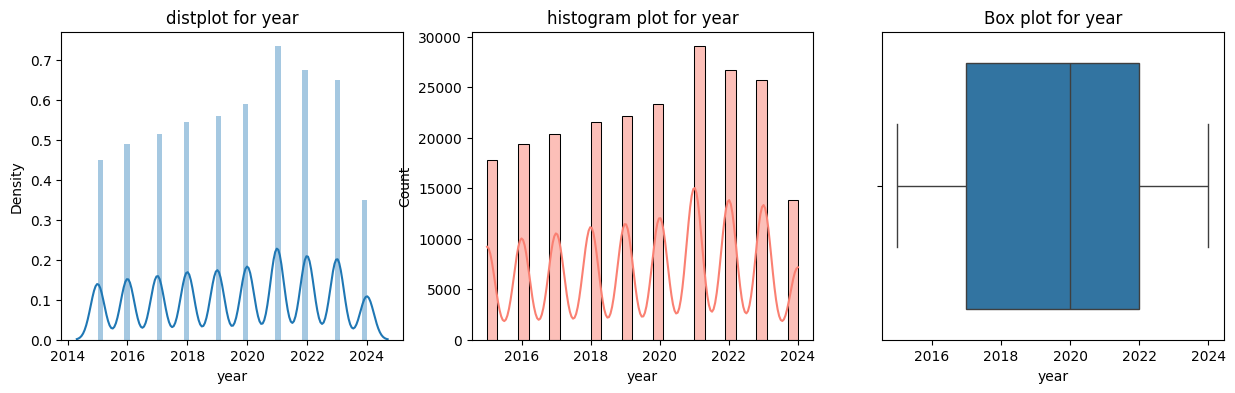

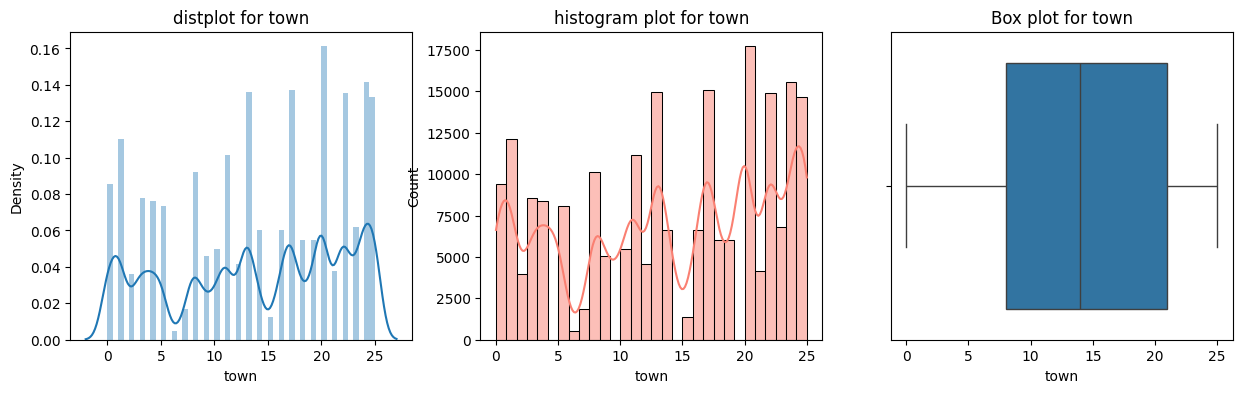

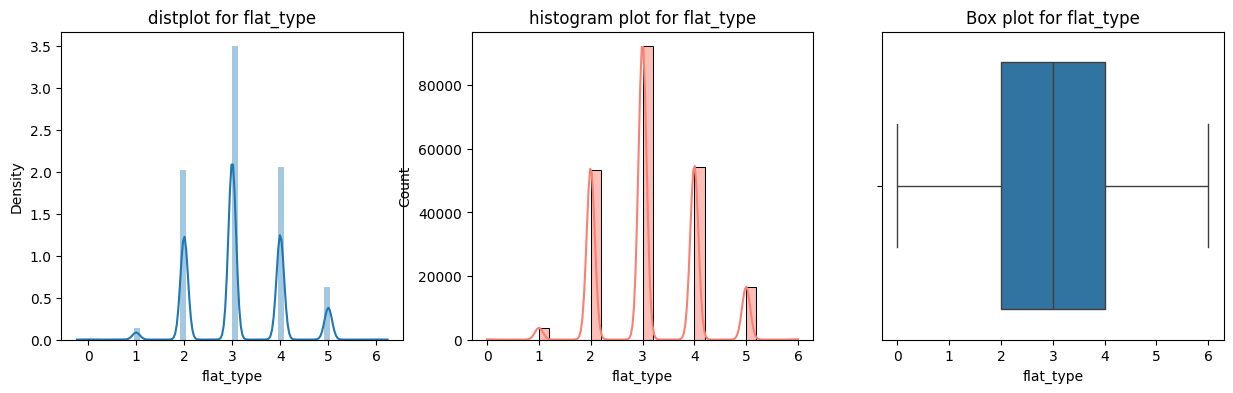

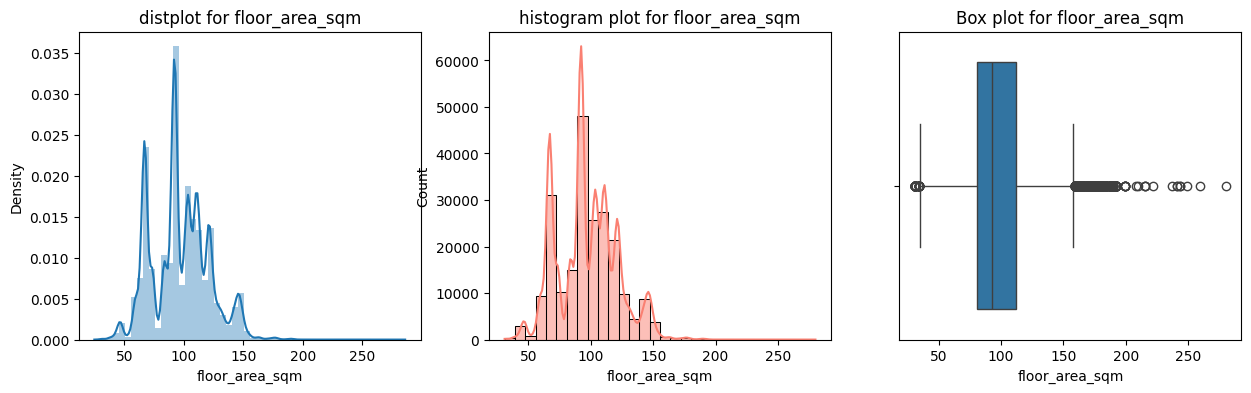

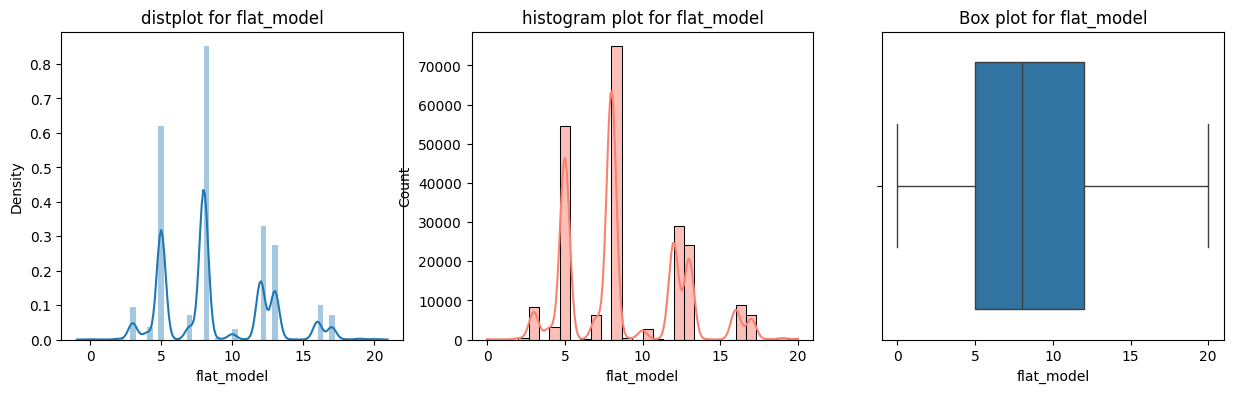

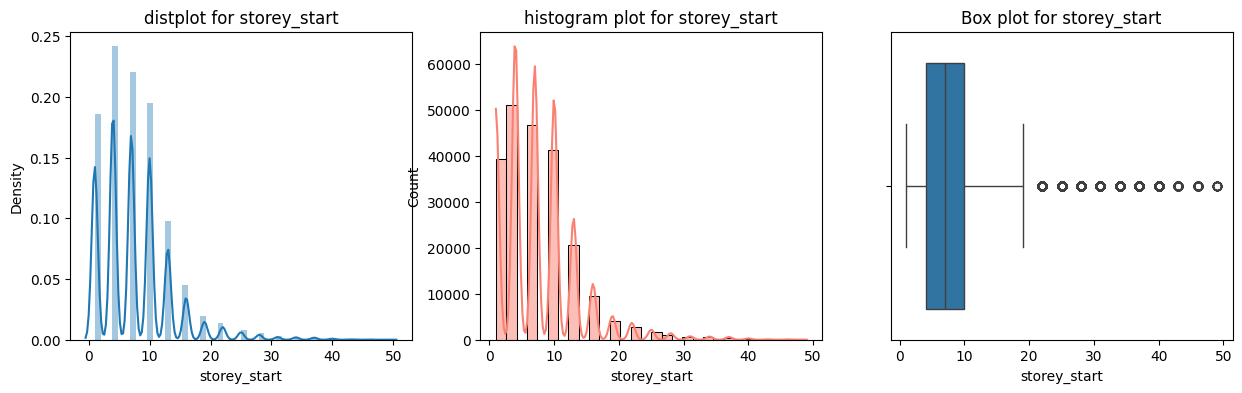

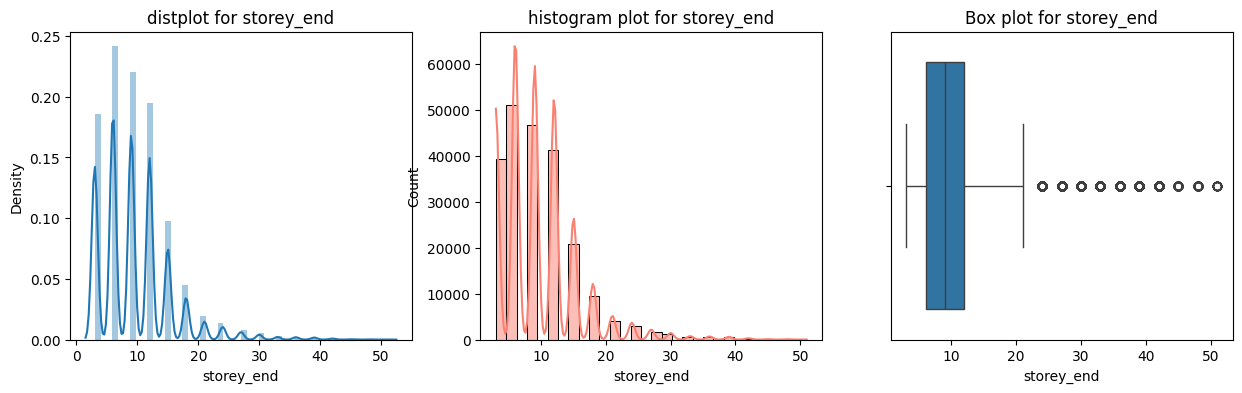

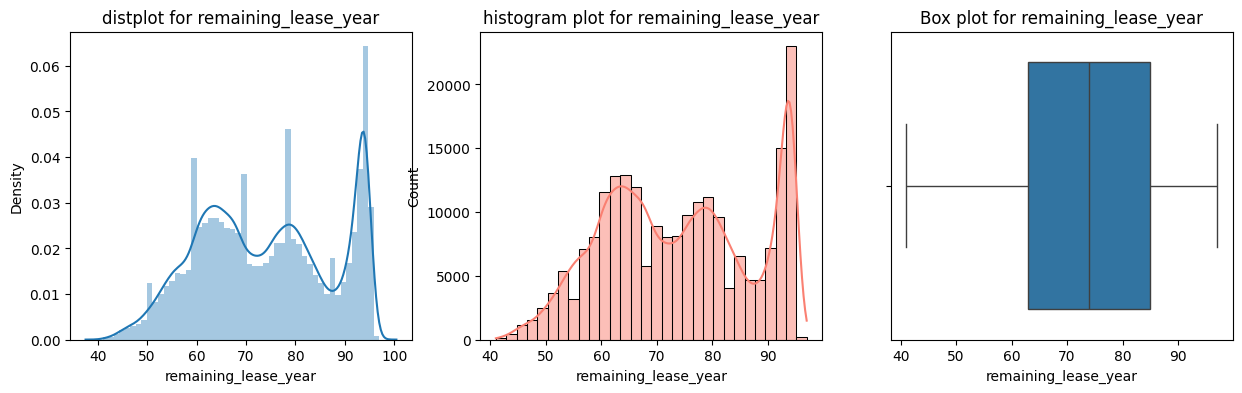

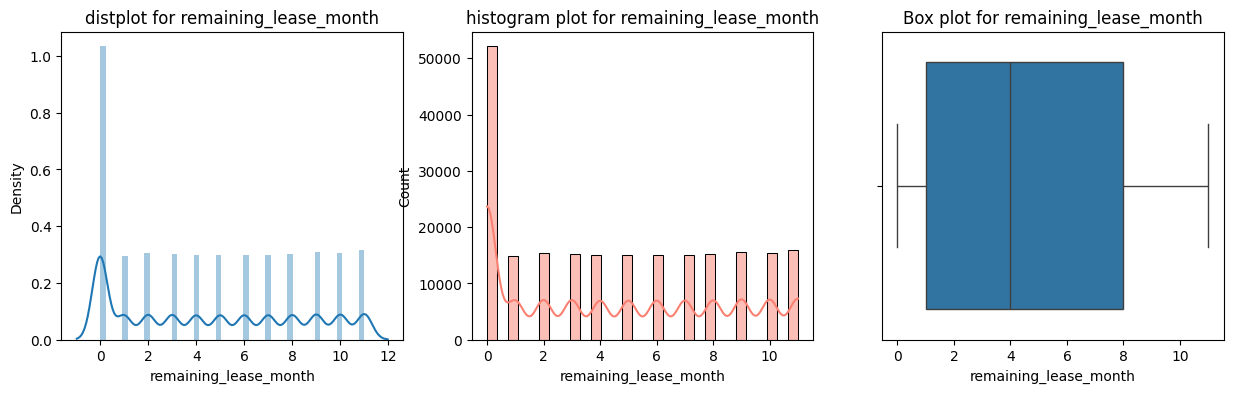

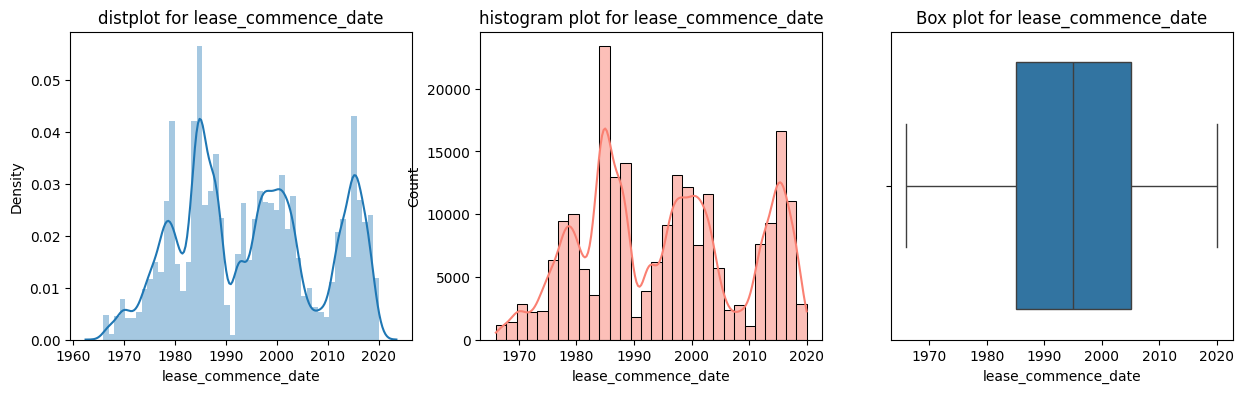

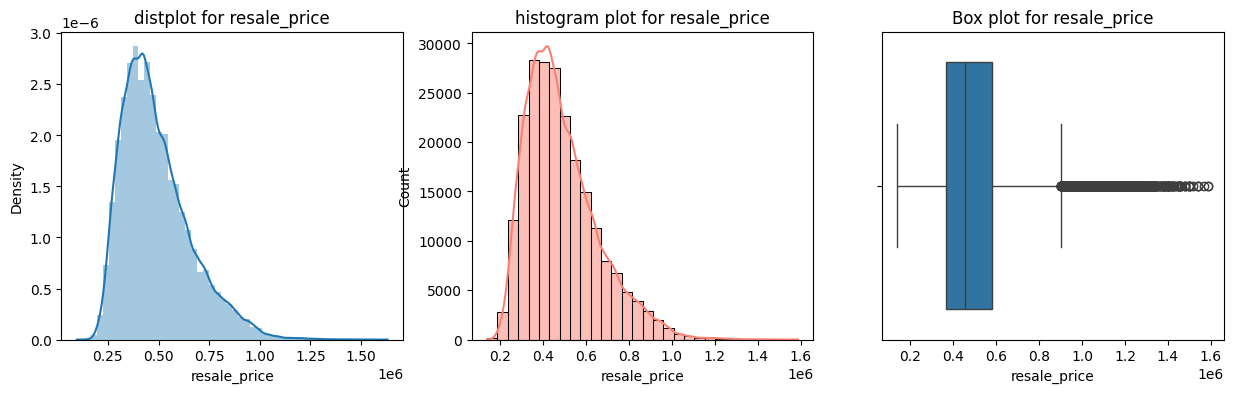

In [51]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [52]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,219843.0,2019.647448,2.703725,2015.0,2017.0,2020.0,2022.0,2024.0
town,219843.0,13.889853,7.957066,0.0,8.0,14.0,21.0,25.0
flat_type,219843.0,3.120290,0.919569,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,219843.0,97.119312,24.064318,31.0,81.0,93.0,112.0,280.0
flat_model,219843.0,8.689060,3.644939,0.0,5.0,8.0,12.0,20.0
storey_start,219843.0,7.659270,5.844721,1.0,4.0,7.0,10.0,49.0
storey_end,219843.0,9.659270,5.844721,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,219843.0,74.087162,13.496217,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,219843.0,4.608421,3.780162,0.0,1.0,4.0,8.0,11.0
lease_commence_date,219843.0,1995.168079,13.701471,1966.0,1985.0,1995.0,2005.0,2020.0


## skewness handling

In [53]:
df_final_3= df_final_2.copy()

In [54]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [55]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

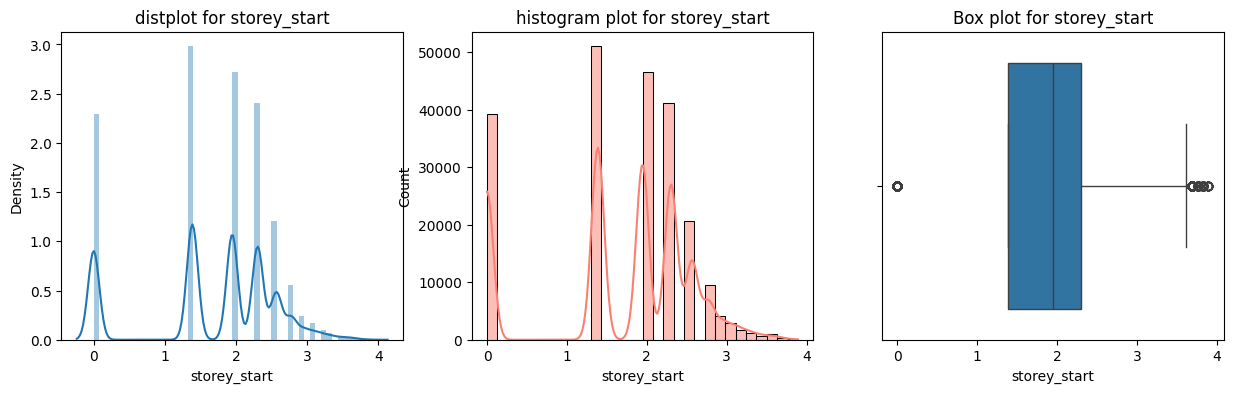

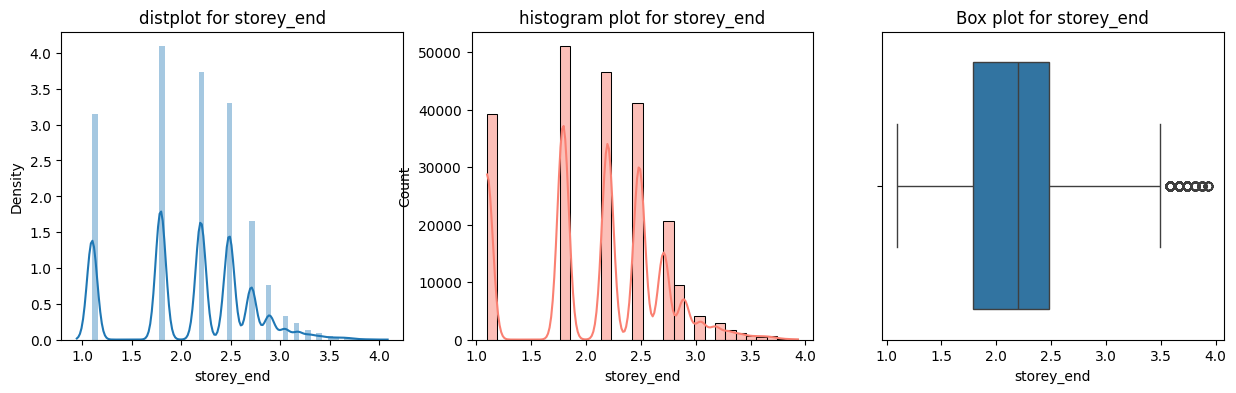

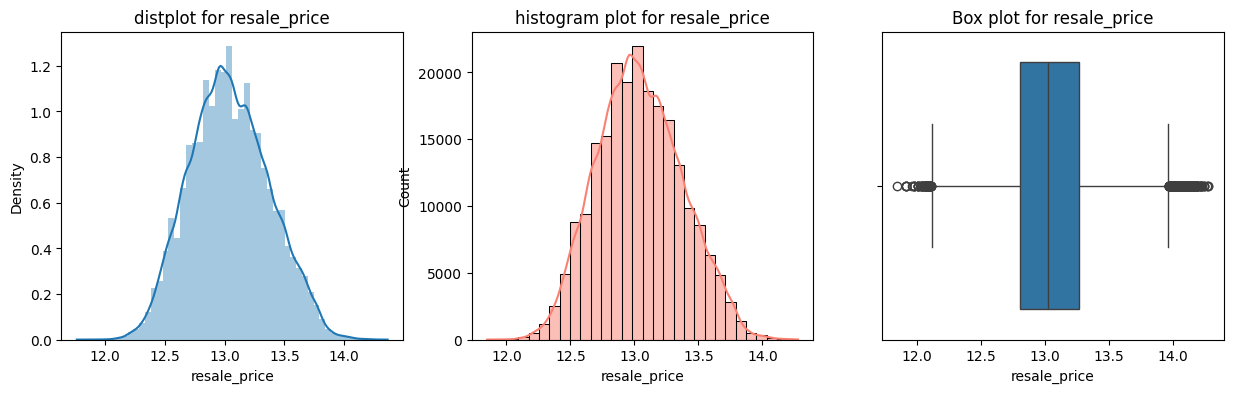

In [56]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

## Outliers Handling - Interquartile Range(IQR) Method

In [57]:
df_final_4= df_final_3.copy()

In [58]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [59]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [60]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [61]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

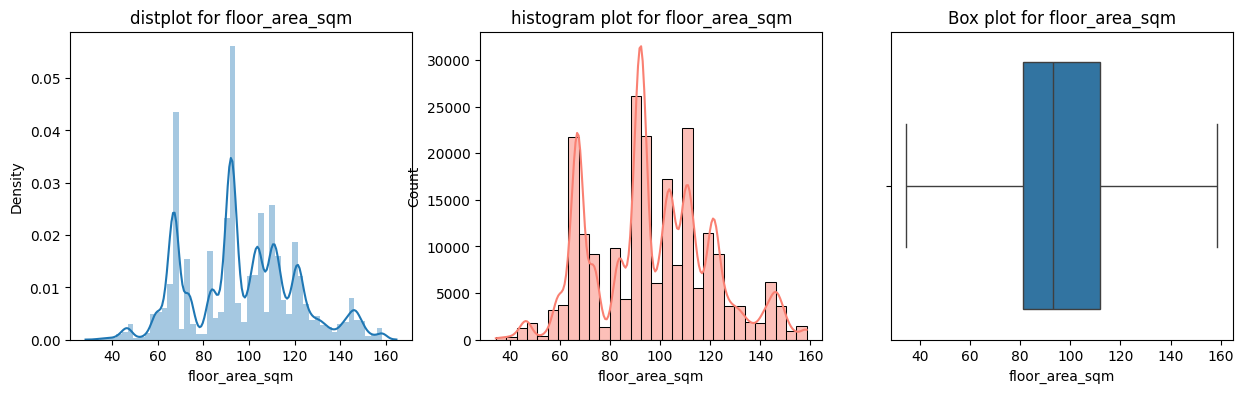

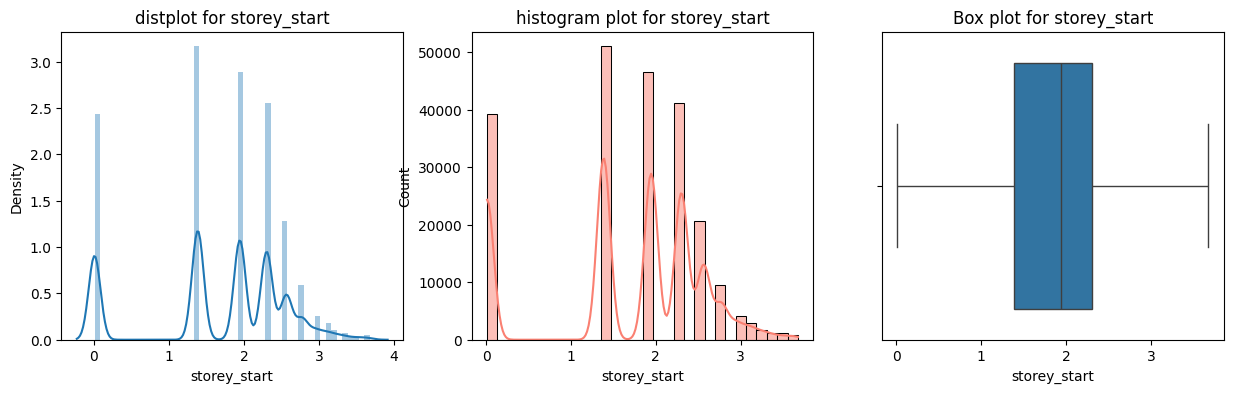

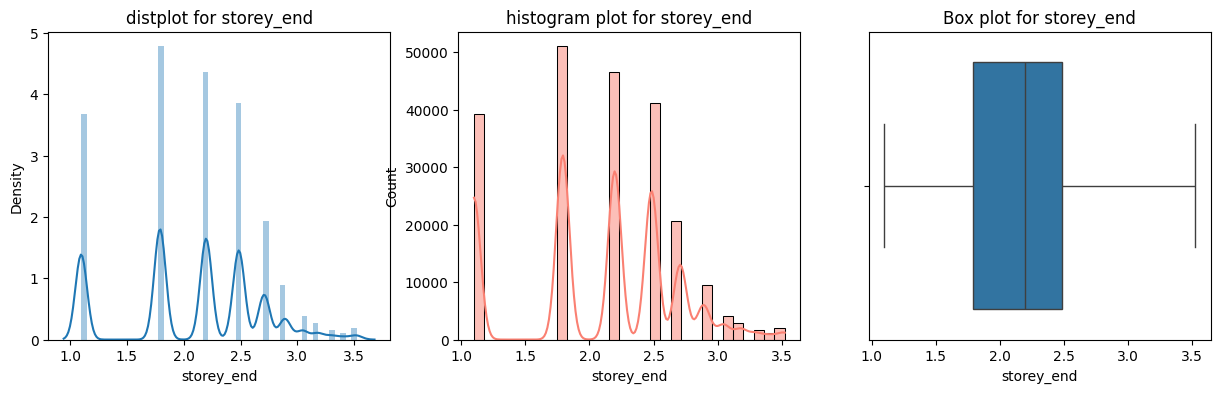

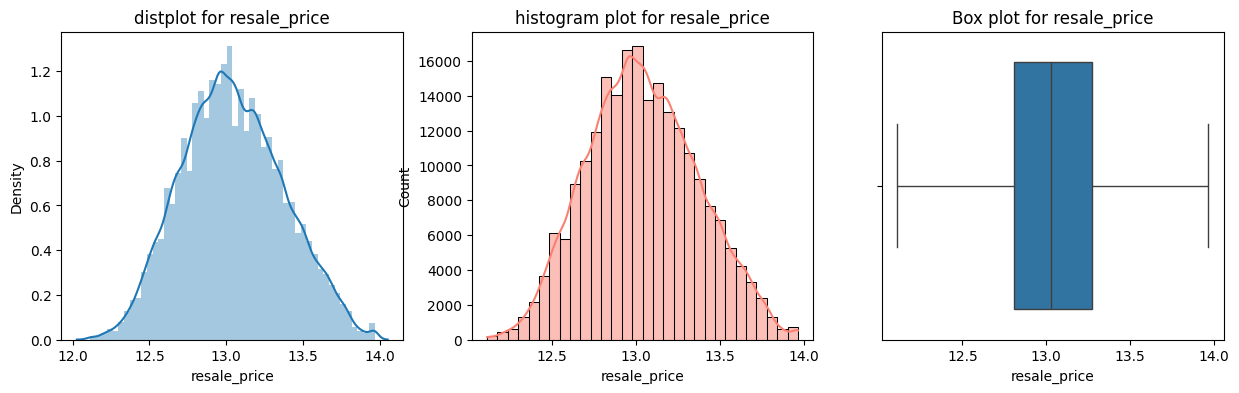

In [62]:
for k in outlier_columns:
    plot(df_final_4,k)

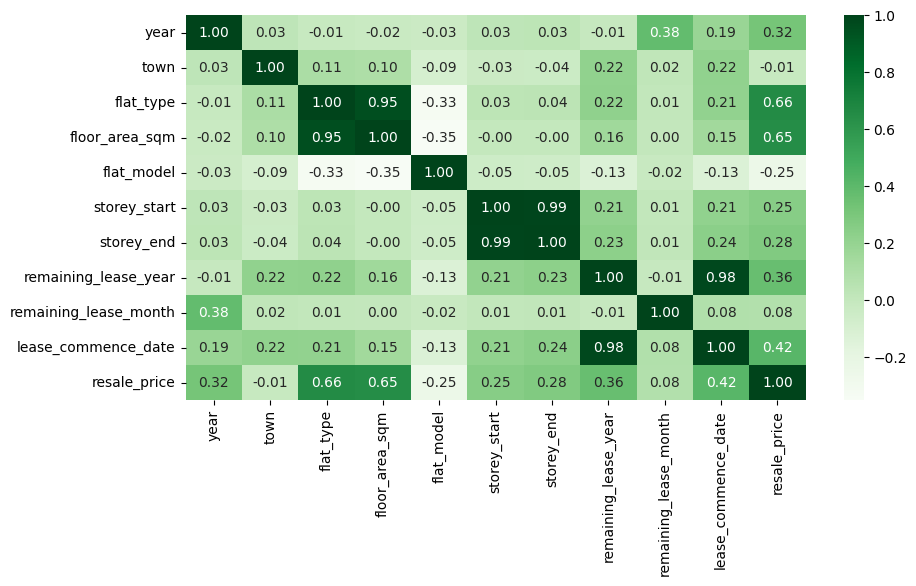

In [63]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

## Model Selection (Regression)

In [64]:
df_final_5= df_final_4.copy()

In [65]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,219843.0,2019.647448,2.703725,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,219843.0,13.889853,7.957066,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,219843.0,3.120290,0.919569,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,219843.0,97.046006,23.830505,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,219843.0,8.689060,3.644939,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,219843.0,1.695787,0.920798,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,219843.0,2.093493,0.601251,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,219843.0,74.087162,13.496217,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,219843.0,4.608421,3.780162,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,219843.0,1995.168079,13.701471,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


In [66]:
np.exp(13.942690)

1135620.7776035476

In [67]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
36467,2016,12,14,2.0,259.0,18.0,6821,1,3,54,0,1972,1150000.0
38448,2017,2,2,4.0,120.0,4.0,3227,40,42,93,7,2011,1180000.0
47892,2017,7,18,5.0,156.0,3.0,1228,19,21,77,3,1995,1160000.0
54395,2017,11,7,4.0,107.0,20.0,1944,43,45,92,2,2011,1138000.0
60199,2018,3,7,4.0,107.0,20.0,1941,37,39,91,10,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219517,2024,6,23,3.0,93.0,8.0,943,31,33,93,3,2018,1200000.0
219542,2024,6,23,4.0,114.0,4.0,1083,19,21,87,0,2012,1280000.0
219543,2024,6,23,4.0,117.0,4.0,1083,31,33,86,11,2012,1540000.0
219544,2024,6,23,4.0,117.0,4.0,1084,19,21,86,11,2012,1420000.0


In [68]:
np.exp(12.104561)

180694.13157722994

In [69]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8085,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6206,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3558,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1415,1,3,55,11,1975,180000.0
65495,2018,6,4,0.0,31.0,5.0,8085,1,3,55,10,1975,176000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,2020,11,4,1.0,42.0,17.0,5846,10,12,48,5,1970,180000.0
126747,2021,1,24,1.0,45.0,5.0,2345,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8085,4,6,53,1,1975,180000.0
197149,2023,8,22,2.0,67.0,8.0,6378,7,9,91,3,2015,150000.0


In [70]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [71]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [72]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6768679351285247, 'Mean_squared_error': 0.035649664525063456, 'Root_mean_squared_error': 0.18881118749974393, 'Mean_absolute_error': 0.1478269412708834}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6754454830826984, 'Mean_squared_error': 0.03556858993794268, 'Root_mean_squared_error': 0.188596367775052, 'Mean_absolute_error': 0.1476321163490405}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9962497037495017, 'Mean_squared_error': 0.00041375282039263087, 'Root_mean_squared_error': 0.020340914934993237, 'Mean_absolute_error': 0.007241726621819471}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9246900303034954, 'Mean_squared_error': 0.008253372825670463, 'Root_mean_squared_error': 0.09084807551990555, 'Mean_absolute_error': 0.06456681431412996}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9912007193674224, 'Mean_squared_error': 0.000

In [73]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9548698086959185, 'Mean_squared_error': 0.004945909499465689, 'Root_mean_squared_error': 0.0703271604678142, 'Mean_absolute_error': 0.05164528318838862}


In [74]:
df_final_5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [75]:
np.exp(12.815838)

367999.92008841544

In [76]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

12.806369507426163

In [77]:
np.exp(12.792003979535888)

359332.7000997733

In [78]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [79]:
import pickle
import numpy as np

In [80]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [81]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.27963716004553

In [82]:
np.exp(12.313923357750493)

222776.28881715712